# Analysing Last Mile Delivery Data

In [1]:
# Suppressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# Styling the plot
style.use('ggplot')
sns.set_style('whitegrid')

In [3]:
# Adjusting Output Views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# Importing the Dataset
df = pd.read_csv('last mile delivery.csv')

## Inspecting the Dataset

In [5]:
df.shape

(97843, 30)

As we can see there are 30 features, we will inspect which features are important and drop the unnecessary features.

In [6]:
df.head()

,Airwaybill Number,Shipment Type,Ref Airwaybill Number,Order Number,No of Box,Weight,Declared Amount,COD Amount,Item Description,Origin,Destination,Original Destination,Vendor,Shipper,Pickup Address,Pickup Pincode,Consignee,Consignee Address,Destination Pincode,Consignee Number,Inscan Date,Inscan Time,Last Scan Location,User ID,Status,Reason,Delivered Date,Delivered Time,Last Updated On Date,Last Updated On Time
0,703169773,Forward Shipment,None,4.01819E+11,1,2.950,4780.0,4780.0,Oriflame,NOI - Noida,NOI - Noida,NaN,Oriflame India Private Limited,Oriflame India Private Limited - 74009,NOIDADelhi NCR,201301,Dev Karodia,"1804, Mantova, Mahagun Moderne, 8368079942, Se...",201301,8.107678e+09,01-08-2018,08:31:52,NOI - Noida,PRTOUCH PRTOUCH,Delivered,999 - Delivered,01-08-2018,15:15:13,01-08-2018,15:15:13
1,116089130,Forward Shipment,None,SAP24158,4,30.461,0.0,0.0,MODICARE LIMITED,AMB - Ahmedabad,RKTV - Rajkot,NaN,Modicare Limited,Modicare Limited - 15165,MODICARE LIMITED GALA NO.1&3 A SUMAR LOGISTIC...,382427,KULDEEP DUDHATRA,"PRATIK HYTECH PVT. LTD., ROAD NO-G5,PLOT NO-16...",361005,9.510792e+09,01-08-2018,11:04:28,RKTV - Rajkot,PRTOUCH PRTOUCH,Delivered,999 - Delivered,02-08-2018,22:10:27,02-08-2018,22:10:27
2,116089155,Forward Shipment,None,SAP24182,2,16.295,0.0,0.0,MODICARE LIMITED,AMB - Ahmedabad,RKTV - Rajkot,NaN,Modicare Limited,Modicare Limited - 15165,MODICARE LIMITED GALA NO.1&3 A SUMAR LOGISTIC...,382427,PANKAJBHAI RAMESHBHAI JOSHI,"NO. 104 K.G SHOPING CENTERTALAJA,AhmedabadGUJARAT",361005,8.264732e+09,01-08-2018,11:11:45,RKTV - Rajkot,PRTOUCH PRTOUCH,Delivered,999 - Delivered,01-08-2018,22:45:09,01-08-2018,22:45:09
3,115561359,Forward Shipment,None,137914952,1,1.380,0.0,0.0,0,CSO - Chennai South,CNO - Chennai North,NaN,AMWAY INDIA ENTERPRISES PVT.LTD.,AMWAY INDIA ENTERPRISES PVT.LTD. - 24008,API ADDAPI ADDChennai,600029,"GANESAN, VIJAYALAKSHMI R, GANESAN","NO:97,SANTHANA SRINIVAS NIKETAN1ST MAIN RD,WES...",600053,8.056309e+09,01-08-2018,12:21:31,CNO - Chennai North,PRTOUCH PRTOUCH,Delivered,999 - Delivered,01-08-2018,20:24:09,01-08-2018,20:24:09
4,115561347,Forward Shipment,None,137918267,1,0.120,0.0,0.0,0,CSO - Chennai South,CNO - Chennai North,NaN,AMWAY INDIA ENTERPRISES PVT.LTD.,AMWAY INDIA ENTERPRISES PVT.LTD. - 24008,API ADDAPI ADDChennai,600029,"K, SURESH VICTORR S, ESTHER POONKOTH",NO 1039 1ST FLOOR 6TH MAIN ROADERI SCHEME MOGA...,600037,8.939877e+09,01-08-2018,12:18:12,CNO - Chennai North,PRTOUCH PRTOUCH,Delivered,999 - Delivered,02-08-2018,14:42:16,02-08-2018,14:42:16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97843 entries, 0 to 97842
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airwaybill Number      97843 non-null  int64  
 1   Shipment Type          97843 non-null  object 
 2   Ref Airwaybill Number  97843 non-null  object 
 3   Order Number           97838 non-null  object 
 4   No of Box              97843 non-null  int64  
 5   Weight                 97843 non-null  float64
 6   Declared Amount        97843 non-null  float64
 7   COD Amount             97843 non-null  float64
 8   Item Description       97843 non-null  object 
 9   Origin                 97843 non-null  object 
 10  Destination            97843 non-null  object 
 11  Original Destination   126 non-null    object 
 12  Vendor                 97843 non-null  object 
 13  Shipper                97843 non-null  object 
 14  Pickup Address         97843 non-null  object 
 15  Pi

In [8]:
# Null percentage in each column
round((df.isnull().sum()/len(df))*100,4)

Airwaybill Number         0.0000
Shipment Type             0.0000
Ref Airwaybill Number     0.0000
Order Number              0.0051
No of Box                 0.0000
Weight                    0.0000
Declared Amount           0.0000
COD Amount                0.0000
Item Description          0.0000
Origin                    0.0000
Destination               0.0000
Original Destination     99.8712
Vendor                    0.0000
Shipper                   0.0000
Pickup Address            0.0000
Pickup Pincode            0.0000
Consignee                 0.0000
Consignee Address         0.0000
Destination Pincode       0.0000
Consignee Number          0.0000
Inscan Date               0.0000
Inscan Time               0.0000
Last Scan Location        0.0000
User ID                   0.0000
Status                    0.0000
Reason                    0.0000
Delivered Date            0.0000
Delivered Time            0.0000
Last Updated On Date      0.0000
Last Updated On Time      0.0000
dtype: flo

#### Original Destination has 99.9 percent null values. Hence, dropping this column.


In [9]:
df.drop("Original Destination", axis=1,inplace=True)

In [10]:
# Dropping unnecessary columns
df.drop(["Airwaybill Number","Ref Airwaybill Number","Order Number","User ID","Consignee Number","Consignee Address","Consignee"],inplace=True, axis=1)

In [11]:
# Converting Date and time into Datetime format for better understanding 

from datetime import datetime

df["Delivered Date"] = df["Delivered Date"].apply(lambda x: "" if x==" " else x)
df["Last Updated On Date"] = df["Last Updated On Date"].apply(lambda x: "" if x==" " else x)

df["Delivered Time"] = df["Delivered Time"].apply(lambda x: "" if x==" " else x)
df["Last Updated On Time"] = df["Last Updated On Time"].apply(lambda x: "" if x==" " else x)

df[df["Delivered Date"] != ""]["Delivered Date"] = df[df["Delivered Date"] != ""]["Delivered Date"].apply(lambda x : datetime.strptime(x,'%d-%m-%Y'))
df["Delivered Date"] = pd.to_datetime(df["Delivered Date"])
df[df["Last Updated On Date"] != ""]["Last Updated On Date"]= df[df["Last Updated On Date"] != ""]["Last Updated On Date"].apply(lambda x : datetime.strptime(x,'%d-%m-%Y'))
df["Last Updated On Date"] = pd.to_datetime(df["Last Updated On Date"])

df[df["Delivered Time"] != ""]["Delivered Time"] = df[df["Delivered Time"] != ""]["Delivered Time"].apply(lambda x : datetime.strptime(x,'%H:%M:%S'))
df["Delivered Time"] = pd.to_datetime(df["Delivered Time"])
df[df["Last Updated On Time"] != ""]["Last Updated On Time"]= df[df["Last Updated On Time"] != ""]["Last Updated On Time"].apply(lambda x : datetime.strptime(x,'%H:%M:%S'))
df["Last Updated On Time"] = pd.to_datetime(df["Last Updated On Time"])




### After cleaning the dataset, we will proceed with analysing individual variables.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97843 entries, 0 to 97842
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Shipment Type         97843 non-null  object        
 1   No of Box             97843 non-null  int64         
 2   Weight                97843 non-null  float64       
 3   Declared Amount       97843 non-null  float64       
 4   COD Amount            97843 non-null  float64       
 5   Item Description      97843 non-null  object        
 6   Origin                97843 non-null  object        
 7   Destination           97843 non-null  object        
 8   Vendor                97843 non-null  object        
 9   Shipper               97843 non-null  object        
 10  Pickup Address        97843 non-null  object        
 11  Pickup Pincode        97843 non-null  object        
 12  Destination Pincode   97843 non-null  int64         
 13  Inscan Date     

### Shipment Type

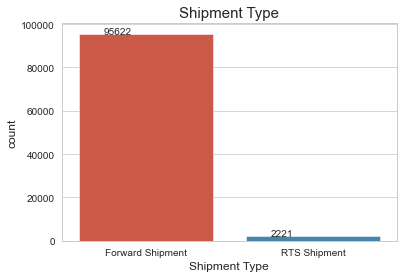

In [13]:
sns.countplot(df["Shipment Type"])
plt.title("Shipment Type",fontsize = 15)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(df["Shipment Type"].value_counts().values):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.show()

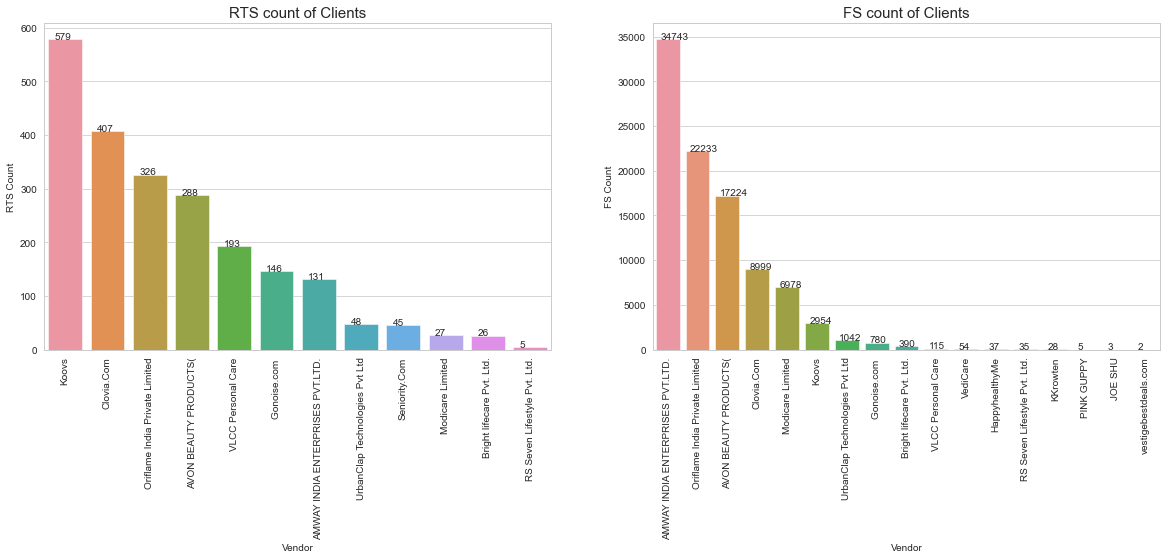

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
v = df[df["Shipment Type"] == "RTS Shipment"]["Vendor"].value_counts().sort_values(ascending=False)
v = v.reset_index()
v.columns = ["Vendor", "RTS Count"]
sns.barplot(data=v,x="Vendor",y="RTS Count")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(v["RTS Count"]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.xticks(rotation=90)
plt.title("RTS count of Clients", fontsize=15)
plt.xlabel("Vendor",fontsize=10)
plt.ylabel("RTS Count", fontsize=10)
plt.subplot(1,2,2)
v = df[df["Shipment Type"] == "Forward Shipment"]["Vendor"].value_counts().sort_values(ascending=False)
v = v.reset_index()
v.columns = ["Vendor", "FS Count"]
sns.barplot(data=v,x="Vendor",y="FS Count")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(v["FS Count"]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.xticks(rotation=90)
plt.title("FS count of Clients", fontsize=15)
plt.xlabel("Vendor",fontsize=10)
plt.ylabel("FS Count", fontsize=10)
plt.show()


- AMWAY INDIA got us most business in case of Forward Shipments and Koovs in case of RTS.
- VLCC has more RTS than FS.
- Major Client base - AMWAY,Oriflame,Avon,Clovia,Koovs and Modicare

### Declared Amount vs COD

In [15]:
(df["Declared Amount"]-df["COD Amount"]).describe()

count     97843.000000
mean        449.926629
std        3426.218233
min      -15942.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      766500.000000
dtype: float64

### No of Box

In [16]:
# no_of_box
no_of_boxes = df["No of Box"].value_counts().reset_index()
no_of_boxes.columns = ["No_of_Box", "frequency"]
no_of_boxes.sort_values("No_of_Box")
no_of_boxes["probability"] = round(no_of_boxes["frequency"]/df.shape[0]*100,3)
no_of_boxes

,No_of_Box,frequency,probability
0,1,89030,90.993
1,2,4787,4.893
2,3,1351,1.381
3,4,702,0.717
4,5,499,0.510
5,6,385,0.393
6,7,290,0.296
7,8,191,0.195
8,9,155,0.158
9,10,113,0.115


In [17]:
# Feature Engineering
def clubbing(x):
    if x==1:
        return x 
    elif x in range(2,6):
        return "2-5"
    elif x in range(6,21):
        return "6-20"
    else:
        return ">20"
        
        
    
df["boxes"] = df["No of Box"].apply(clubbing)

In [18]:
df["boxes"].value_counts() 

1       89030
2-5      7339
6-20     1424
>20        50
Name: boxes, dtype: int64

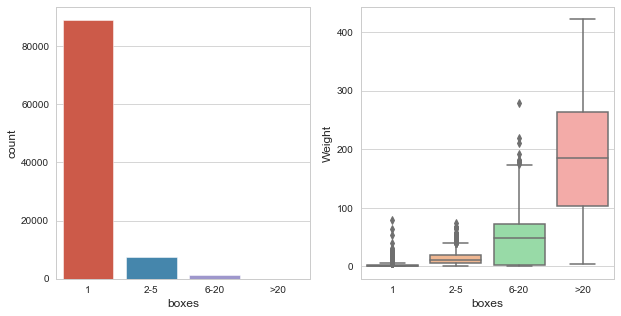

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df["boxes"])
plt.subplot(1,2,2)
sns.boxplot(y=df["Weight"], x=df["boxes"],palette="pastel")

In [20]:
# checking correlation between no_of_boxes and weight
df[["No of Box","Weight"]].corr()

,No of Box,Weight
No of Box,1.00000,0.81158
Weight,0.81158,1.00000


#### It was expected that weight shall increase with increase in boxes. Which is observed here as well. So we can say that our data is corrected tabulated. there are no discrepancies.

### Origin - Destination

In [21]:
df["Origin"].value_counts()

MPP - Mahipalpur                  18619
THN - Thane                       11173
DWK - Dwarka Puri DC              10729
KDC - Kudghat                      7859
ADR - Andheri-Mumbai               6117
MHD - Mahadevpura                  5594
HWR - Kolkata-Howrah               5166
PCV - Pawan Courier Virtual        3976
SLK - Kolkata -Salt Lake           3887
JNG - Jai Nagar                    3612
AMB - Ahmedabad                    3595
CSO - Chennai South                2903
CHD - Chandigarh                   2263
JGP - Jagat Puri DC                2087
BBRH - Bhubaneswar                 1605
GGN - Gurgaon                      1539
NOI - Noida                        1475
GUW - Guwahati DC                  1367
VRN - Varanasi DC                  1265
PTNH - Patna                       1057
MPPH - Mahipalpur HUB               921
RHN - Shastri Nagar DC              101
YWN - Yashwantpura                   97
PTN - Patna                          75
SJV - SJ Courier BLR                 71


### Feature Engineering 
 - ori_des : origin - destination
 - delivery_type : wether the delivery is inter-city or intra-city

In [22]:
# ori_des
def func(x):
    for i in range(0,len(x)):
        if x[i]== "-":
            a = i
            break
    return(x[0:a].rstrip())    
            
        
df["ori_des"] = df["Origin"].apply(lambda x:func(x)) + "-" + df["Destination"].apply(lambda x:func(x))

In [23]:
df["ori_des"].value_counts()

MPP-MPP      4037
THN-KLN      3086
MPP-DWK      2995
THN-VIR      2578
MHD-JNG      2464
KDC-KDC      2093
KDC-SOD      2064
SLK-KDC      1914
DWK-JNG      1884
HWR-SOD      1745
KDC-SLK      1719
THN-SPD      1684
CSO-CSO      1662
MPP-GGN      1606
BBRH-BBR     1605
ADR-LRP      1539
MPP-RHN      1487
PCV-AMB      1485
JNG-JNG      1457
ADR-KDV      1448
HWR-KDC      1448
NOI-NOI      1373
DWK-DWK      1369
MPP-FBD      1256
MPP-JGP      1235
MPP-LKO      1214
MPP-NOI      1201
JGP-RHN      1192
AMB-RKTV     1188
MHD-MHD      1181
PCV-VDR      1179
ADR-ADR      1177
DWK-MHD      1153
THN-THNV     1125
ADR-VIK      1088
PTNH-PTN     1057
CSO-CNO      1042
GGN-GGN      1033
MHD-YWN      1006
AMB-SRT       906
PCV-SRT       903
AMB-AMB       835
JGP-JGP       821
KDC-HWR       794
THN-KDV       764
THN-ADR       741
KDC-HGL       711
SLK-HGL       710
HWR-SLK       685
HWR-HGL       681
DWK-ADR       677
SLK-SLK       676
MHD-SJV       651
DWK-SJV       640
THN-LRP       621
DWK-YWN   

In [24]:
# delivery_type
df["delivery_type"] = df["ori_des"].apply(lambda x: "inter-city" if x[0:(x.find("-"))] != x[(x.find("-")+1):] 
                                          else "intra-city" )

In [25]:
df["delivery_type"].value_counts(normalize=True)*100

inter-city    79.676625
intra-city    20.323375
Name: delivery_type, dtype: float64

#### `Approximately 80% of our business involves inter-city deliveries.`

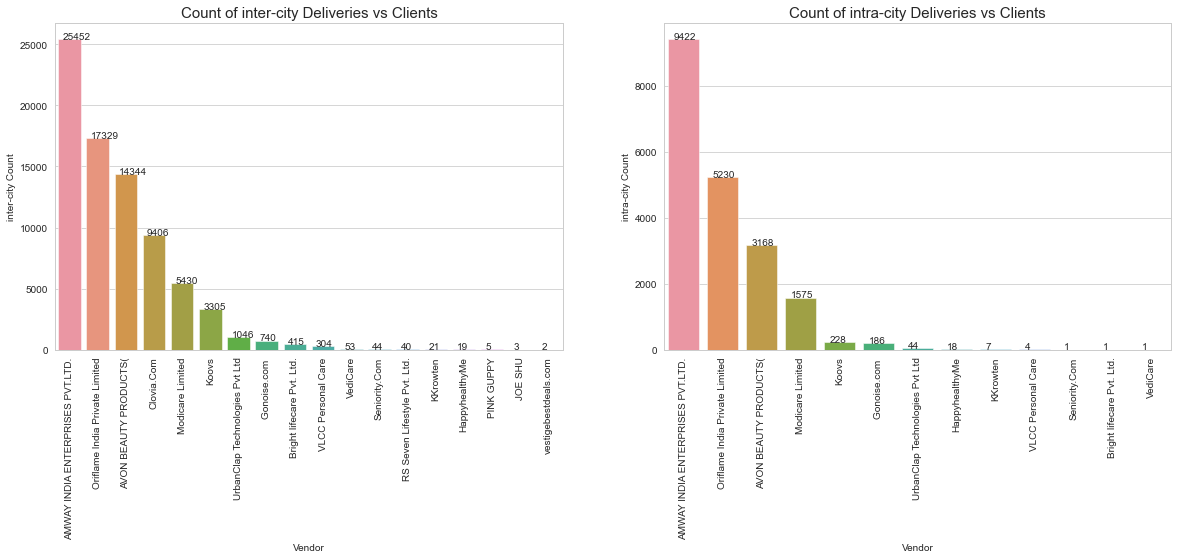

In [26]:
# delivery_type vs Vendors

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
v = df[df["delivery_type"] == "inter-city"]["Vendor"].value_counts().sort_values(ascending=False)
v = v.reset_index()
v.columns = ["Vendor", "inter-city Count"]
sns.barplot(data=v,x="Vendor",y="inter-city Count")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(v["inter-city Count"]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.xticks(rotation=90)
plt.title("Count of inter-city Deliveries vs Clients", fontsize=15)
plt.xlabel("Vendor",fontsize=10)
plt.ylabel("inter-city Count", fontsize=10)
plt.subplot(1,2,2)
v = df[df["delivery_type"] == "intra-city"]["Vendor"].value_counts().sort_values(ascending=False)
v = v.reset_index()
v.columns = ["Vendor", "intra-city Count"]
sns.barplot(data=v,x="Vendor",y="intra-city Count")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(v["intra-city Count"]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.xticks(rotation=90)
plt.title("Count of intra-city Deliveries vs Clients", fontsize=15)
plt.xlabel("Vendor",fontsize=10)
plt.ylabel("intra-city Count", fontsize=10)
plt.show()


`We see a similar kind of pattern in both the graphs wrt Vendors. However, There are more inter-city Deliveries required as compared to intra-city for all the clients.`

### Delivery type vs Delivery status

In [27]:
df[df["delivery_type"]=="inter-city"]["Status"].value_counts(normalize=True)*100

Delivered                           96.164601
Undelivered                          2.500064
Out for delivery                     0.365581
Shipment included in bag             0.343775
Redirected Shipment                  0.266810
Inscan At DC                         0.189846
Bag inscanned at DC                  0.168039
Shipment picked up and inscanned     0.001283
Name: Status, dtype: float64

In [28]:
df[df["delivery_type"]=="intra-city"]["Status"].value_counts(normalize=True)*100

Delivered                   97.822479
Undelivered                  1.694745
Inscan At DC                 0.241388
Out for delivery             0.150867
Shipment included in bag     0.085492
Redirected Shipment          0.005029
Name: Status, dtype: float64

#### `For both inter-city and intra-city, more than 96% packages are sucessfully delivered.`

### Vendors

In [29]:
(df["Vendor"].value_counts(normalize=True)*100).sort_values(ascending=False)

AMWAY INDIA ENTERPRISES PVT.LTD.    35.642816
Oriflame India Private Limited      23.056325
AVON BEAUTY PRODUCTS(               17.898061
Clovia.Com                           9.613360
Modicare Limited                     7.159429
Koovs                                3.610887
UrbanClap Technologies Pvt Ltd       1.114030
Gonoise.com                          0.946414
Bright lifecare Pvt. Ltd.            0.425171
VLCC Personal Care                   0.314790
VediCare                             0.055190
Seniority.Com                        0.045992
RS Seven Lifestyle Pvt. Ltd.         0.040882
HappyhealthyMe                       0.037816
KKrowten                             0.028617
PINK GUPPY                           0.005110
JOE SHU                              0.003066
vestigebestdeals.com                 0.002044
Name: Vendor, dtype: float64

#### `AMWAY, Oriflame, AVON constitute more than 75% of our client base.`

### Shipper

In [30]:
df["Shipper"].value_counts()

AMWAY INDIA ENTERPRISES PVT.LTD. - 24008    34874
Oriflame India Private Limited - 74009      22559
AVON BEAUTY PRODUCTS( - 46057               17512
Clovia.Com - 33178                           9406
Modicare Limited - 15165                     7005
Koovs - 22134                                3533
UrbanClap Technologies Pvt Ltd - 28153       1090
Gonoise.com  - 42033                          926
Bright lifecare Pvt. Ltd. - 58044             416
VLCC Personal Care - 22126                    308
VediCare - 46182                               54
Seniority.Com - 62181                          45
RS Seven Lifestyle Pvt. Ltd. - 94092           40
HappyhealthyMe - 19177                         37
KKrowten - 69174                               28
PINK GUPPY - 30160                              5
JOE SHU - 49131                                 3
vestigebestdeals.com - 10091                    2
Name: Shipper, dtype: int64

In [31]:
# Dropping Shipper because Shipper and Vendor are same.
df.drop("Shipper",axis=1,inplace=True)

### Pickup Address

In [32]:
df["Pickup Address"].value_counts()

KOLKATAkolkata                                                                                                                                   13005
Purple Panda Warehouse Khasra No 566/1, Arun Plaza, Bijwasan,Near Amity College, Palam Vihar Road,NeDelhi NCR                                     9406
API ADDAPI ADDMumbai                                                                                                                              9257
JANPATHDelhi NCR                                                                                                                                  7776
BHIWANDIMumbai                                                                                                                                    7658
API ADDAPI ADDDelhi NCR                                                                                                                           6298
API ADDAPI ADDBangalore                                                                       

In [33]:
# We dont require this column as of now, so we will drop this. We will use Pickup Pincode instead.
df.drop("Pickup Address", axis=1, inplace=True)

### Pickup Pincode
##### I want to know the region by using pincode. Got the list online, will use this list to extract state.
- 11 - Delhi
- 12, 13 - Haryana
- 14, 15 - Punjab
- 16 - Chandigarh
- 17 - Himachal Pradesh
- 18 to 19 - Jammu & Kashmir
- 20 to 28 - Uttar Pradesh, Uttarakhand
- 30 to 34 - Rajasthan
- 36 to 39 - Gujarat
- 40 - Goa
- 40 to 44 - Maharashtra
- 45 to 48 - Madhya Pradesh
- 49 - Chhattisgarh
- 50 to 53 - Andhra Pradesh
- 56 to 59 - Karnataka
- 60 to 64 - Tamil Nadu
- 67 to 69 - Kerala
- 682 - Lakshadweep
- 70, 74 - West Bengal
- 744 - Andaman & Nicobar
- 75, 77 - Odisha
- 78 - Assam
- 79 - Arunachal Pradesh
- 793, 794, 783123 - Meghalaya
- 795 - Manipur
- 796 - Mizoram
- 799 - Tripura
- 80 to 85 - Bihar, Jharkhand

In [34]:
df["Pickup Pincode"].apply(lambda x:x[0:2]).value_counts()

11    32673
70    11610
42    11299
56     9063
38     7574
40     6086
71     5169
60     2911
14     2371
12     2346
75     1614
78     1401
20     1373
22     1260
80     1087
No        4
30        2
Name: Pickup Pincode, dtype: int64

### Feature Engineering 
- Pickup City

In [35]:
def city(x):
    m = {"11":"Delhi", "70":"WestBengal", "42":"Maharashtra", "56":"Karnataka", "38": "Gujrat", "40":"Maharashtra", 
         "71": "WestBengal", "60":"Tamilnadu","14": "Punjab","12":"Haryana","75":"Odisha","78":"Assam","20":"UttarPradesh, Uttrakhand",
         "22":"UttarPradesh, Uttrakhand","80":"Bihar, Jharkhand","No":"Unknown","30":"Rajasthan"}
    a = x
    i = x[0:2]
    if i in m:
        a = m[i]
    return(a)
        
df["Pickup City"] = df["Pickup Pincode"].apply(lambda x: city(x))


In [51]:
df["Pickup City"].value_counts(normalize = True)*100

Delhi                       33.393293
Maharashtra                 17.768261
WestBengal                  17.148902
Karnataka                    9.262799
Gujrat                       7.740973
Tamilnadu                    2.975175
UttarPradesh, Uttrakhand     2.691046
Punjab                       2.423270
Haryana                      2.397719
Odisha                       1.649581
Assam                        1.431886
Bihar, Jharkhand             1.110963
Unknown                      0.004088
Rajasthan                    0.002044
Name: Pickup City, dtype: float64

`Delhi, Maharashtra, WestBengal are pickup hubs. More than 68% times pickup is from one of these states. On the flip side Rajasthan, Bihar, Assam, Odisha have very less pickups happening.`

### Delivery Status

In [37]:
df["Status"].value_counts()

Delivered                           94420
Undelivered                          2286
Out for delivery                      315
Shipment included in bag              285
Redirected Shipment                   209
Inscan At DC                          196
Bag inscanned at DC                   131
Shipment picked up and inscanned        1
Name: Status, dtype: int64

In [38]:
# Inscan At DC = Bag inscanned at DC = Shipment picked up and inscanned
df["Status"] = df["Status"].apply(lambda x : "Inscaned at DC" if x=="Bag inscanned at DC" or x=="Shipment picked up and inscanned" or x=="Inscan At DC" else x)

In [39]:
df["Status"].value_counts()

Delivered                   94420
Undelivered                  2286
Inscaned at DC                328
Out for delivery              315
Shipment included in bag      285
Redirected Shipment           209
Name: Status, dtype: int64

Text(0, 0.5, 'Percentage Undelivered')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


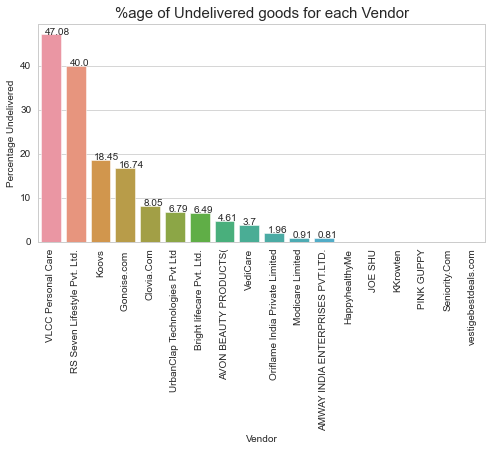

In [40]:
plt.figure(figsize=(8,4))
temp = round((df[df["Status"] != "Delivered"]["Vendor"].value_counts()/df["Vendor"].value_counts()*100),2).sort_values(ascending=False)
temp = temp.reset_index()
temp.columns = ["Vendor", "Percentage Undelivered"]
sns.barplot(data=temp,x="Vendor",y="Percentage Undelivered")
xlocs, xlabs = plt.xticks()
for i, j in enumerate(temp["Percentage Undelivered"]):
    plt.text(xlocs[i] - 0.25, j + 0.01, str(j))
plt.xticks(rotation=90)
plt.title("%age of Undelivered goods for each Vendor", fontsize=15)
plt.xlabel("Vendor",fontsize=10)
plt.ylabel("Percentage Undelivered", fontsize=10)

#### Here, we can see that VLCC, RS Seven, Koovs and Gonoise.com have more than 50% of goods undelivered. Lets find out the reason for the same.

### Reason

In [41]:
df[(df["Vendor"] == "VLCC Personal Care") & (df["Status"] != "Delivered")]["Reason"].value_counts()

221 - Consignee Refused To Accept                        52
777 - RTS - Return To Shipper                            38
202 - Correction Of Wrong POD Details                    24
207 - Misrouted due to Shipper's fault                    7
236 - Customer requested delivery on another date         7
235 - Address not found & phone not picked up             5
234 - Address not found & wrong contact No                3
231 - Address Unlocatable - Consignee not contactable     2
230 - Misrouted due to Holisol's fault                    1
222 - Address Incorrect                                   1
219 - Consignee Not Available                             1
237 - Customer out of station                             1
217 - Delivery Area Not Accessible                        1
223 - Address Incomplete                                  1
232 - House Lock                                          1
Name: Reason, dtype: int64

In [42]:
df[(df["Vendor"] == "RS Seven Lifestyle Pvt. Ltd.") & (df["Status"] != "Delivered")]["Reason"].value_counts()

777 - RTS - Return To Shipper             9
221 - Consignee Refused To Accept         3
None                                      2
230 - Misrouted due to Holisol's fault    1
207 - Misrouted due to Shipper's fault    1
Name: Reason, dtype: int64

In [43]:
df[(df["Vendor"] == "Koovs") & (df["Status"] != "Delivered")]["Reason"].value_counts()

777 - RTS - Return To Shipper                            326
221 - Consignee Refused To Accept                        169
207 - Misrouted due to Shipper's fault                    50
236 - Customer requested delivery on another date         33
235 - Address not found & phone not picked up             12
231 - Address Unlocatable - Consignee not contactable      7
None                                                       7
227 - Residence/Office Closed                              5
232 - House Lock                                           5
223 - Address Incomplete                                   5
212 - Consignee Out Of Station                             5
213 - Scheduled for Next Day Delivery                      5
237 - Customer out of station                              4
219 - Consignee Not Available                              3
233 - Cash not ready                                       3
333 - Shipment Lost                                        3
234 - Address not found 

In [44]:
df[(df["Vendor"] == "Gonoise.com ") & (df["Status"] != "Delivered")]["Reason"].value_counts()

777 - RTS - Return To Shipper                        126
207 - Misrouted due to Shipper's fault                10
221 - Consignee Refused To Accept                      8
236 - Customer requested delivery on another date      3
232 - House Lock                                       3
213 - Scheduled for Next Day Delivery                  2
208 - Contents Missing                                 1
234 - Address not found & wrong contact No             1
230 - Misrouted due to Holisol's fault                 1
Name: Reason, dtype: int64

#### `There are 3 cases which are due to holisol's fault. All others are either on customers end or due to incorrect address.`
#### `Solutions : `
- 1) Customers should also be asked to share a pinned location along with written address.
- 2) End Customer should be called for confirmation before actually disbursing the parcel.
- 3) Also, we need to find a solution for "Misrouted due to Shippers fault".

### Now, lets club similar reasons under same name for simple understanding.

In [45]:
df["Reason"].value_counts()

999 - Delivered                                            94328
777 - RTS - Return To Shipper                               1471
221 - Consignee Refused To Accept                            437
None                                                         405
236 - Customer requested delivery on another date            278
207 - Misrouted due to Shipper's fault                       197
235 - Address not found & phone not picked up                125
210 - COD Amount Not Ready                                   106
213 - Scheduled for Next Day Delivery                         72
219 - Consignee Not Available                                 54
230 - Misrouted due to Holisol's fault                        53
233 - Cash not ready                                          43
232 - House Lock                                              41
231 - Address Unlocatable - Consignee not contactable         31
202 - Correction Of Wrong POD Details                         31
234 - Address not found &

In [46]:
def func(x):
    Delivered = ["999 - Delivered"]
    Return = ["777 - RTS - Return To Shipper","203 - Re-attempt and Return"]
    none = ["None"]
    Shippers_fault = ["207 - Misrouted due to Shipper's fault", "302 - Shipment Damaged", "888 - Shipment Destroyed/Abandoned", "333 - Shipment Lost"]
    delayed_delivery = ["216 - Late Arrival/Scheduled for Next Working Day","236 - Customer requested delivery on another date","304 - Network Delay","208 - Contents Missing","226 - Holiday/Weekly off - Delivery on Next Working Day"]
    others = ["201 - Awaiting Consignee's Response for Delivery","213 - Scheduled for Next Day Delivery","100 - Delay in Delivery Expected","238 - Vehicle break down","240 - Heavy rain fall"]
    Holisols_fault = ["230 - Misrouted due to Holisol's fault",""]
    Customers_fault = ["221 - Consignee Refused To Accept","210 - COD Amount Not Ready","219 - Consignee Not Available","233 - Cash not ready","232 - House Lock","234 - Address not found & wrong contact No","231 - Address Unlocatable - Consignee not contactable","202 - Correction Of Wrong POD Details","237 - Customer out of station","212 - Consignee Out Of Station","218 - Consignee Shifted from the Given Address","209 - Consignee Refusing to Pay COD Amount","242 - Entry refused and phone not reachable","241 - Customer requested delivery on another address","220 - No Such Consignee At Given Address"]
    Address_Issue = ["235 - Address not found & phone not picked up","227 - Residence/Office Closed","223 - Address Incomplete","222 - Address Incorrect","217 - Delivery Area Not Accessible","228 - Out of Delivery Area"]
    reason = x
    if x in Delivered:
        reason = "Delivered"
    elif x in Return:
        reason = "Return"
    elif x in none:
        reason="None"
    elif x in Shippers_fault:
        reason = "Shippers Fault"
    elif x in delayed_delivery:
        reason = "Delayed Delivery"
    elif x in others:
        reason = "Others"
    elif x in Holisols_fault:
        reason = "Holisols Fault"
    elif x in Customers_fault:
        reason = "Customers Fault"
    elif x in Address_Issue:
        reason = "Address Issue"
    else:
        reason = x
    return(reason)    

df["clubbed_reason"] = df["Reason"].apply(lambda x:func(x))


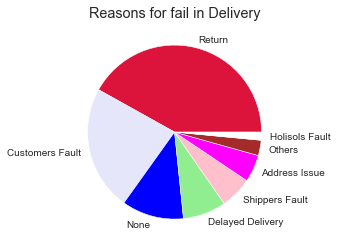

In [47]:
df[df["clubbed_reason"]!= "Delivered"]["clubbed_reason"].value_counts().plot.pie(
    colors=["#DC143C","lavender","blue","lightgreen","pink","magenta","brown","white"])
plt.ylabel("")
plt.title("Reasons for fail in Delivery")
plt.show()

#### `As we can see more than 60% of deliveries didn't take place due to 2 reasons.`
- Return
- Customers Fault.

### Delivered Date vs Last updated on Date

In [48]:
df["Lag"] = df["Last Updated On Date"] - df["Delivered Date"]
df["Lag"].value_counts()

0 days    94411
Name: Lag, dtype: int64

### Delivered Time vs Last updated on Time

In [49]:
df["Lag"] = df["Last Updated On Time"] - df["Delivered Time"]
df["Lag"].value_counts()

0 days    94411
Name: Lag, dtype: int64

#### We can see that there was no delay in updation of the status. It was updated at the time of delivery itself. Thats good thing.

## Summary

 - AMWAY INDIA got us most business in case of Forward Shipments and Koovs in case of RTS.
 
 - VLCC has more RTS than FS.
 
 - Major Client base - AMWAY,Oriflame,Avon,Clovia,Koovs and Modicare.
 
 - Approximately 80% of our business involves inter-city deliveries.
 
 - For both inter-city and intra-city, more than 96% packages are sucessfully delivered.
 
 - AMWAY, Oriflame, AVON constitute more than 75% of our client base.
 
 - Delhi, Maharashtra, WestBengal are pickup hubs.More than 68% times pickup is from one of these states. 
   On the flip side Rajasthan, Bihar, Assam, Odisha have very less pickups happening.
   
 - The cases when the parcel went undelivered were mostly (more than 60% of times) due to 2 reasons:
         1)Return
         2)Customers Fault : Consignee Refused To Accept, COD Amount Not Ready, House Lock etc. 
         
 - There are 3 cases which are due to holisol's fault. All others are either on customers end or due to 
   incorrect address.
   
   Solutions :
     - Customers should be asked to share a pinned location along with written address while placing an order.
     - End Customer should be called for confirmation before actually disbursing the package.
     - Also, we need to find a solution for "Misrouted due to Shippers and holisols fault" by digging deep into
      the issue..
   